In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from script.data_loading import get_path, study_info
from script.junctions import junctions_and_count

In [2]:
study_info.head()

,splice,expression,wgs_brass,wgs_pindel,wgs_caveman,total_size
case_id,,,,,,
c1442467-d618-435f-8792-b1a18f696f1a,65c868ba-94ed-43f2-bfd1-814979ee9486.rna_seq.s...,65c868ba-94ed-43f2-bfd1-814979ee9486.rna_seq.a...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.BRASS...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.sange...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.CaVEM...,95698959
9435447e-d65f-408b-863b-6576b1d652dd,7c9a2493-5667-48ec-8998-81e13722b4ab.rna_seq.s...,7c9a2493-5667-48ec-8998-81e13722b4ab.rna_seq.a...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.BRASS...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.sange...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.CaVEM...,87714708
0bf6e772-1aa1-4f54-9a50-c1414e2f22f3,1a3dcc95-64bf-4886-9807-9511b24f30af.rna_seq.s...,1a3dcc95-64bf-4886-9807-9511b24f30af.rna_seq.a...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.BRASS...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.sange...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.CaVEM...,96440606
0adf59c6-581a-475d-a2f4-40aa40060b5b,9d025af7-ba40-4329-9308-d039aaad900b.rna_seq.s...,9d025af7-ba40-4329-9308-d039aaad900b.rna_seq.a...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.BRASS...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.sange...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.CaVEM...,95034341
0045349c-69d9-4306-a403-c9c1fa836644,36125e17-48fd-4eea-874c-ed2e2e218402.rna_seq.s...,36125e17-48fd-4eea-874c-ed2e2e218402.rna_seq.a...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.BRASS...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.sange...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.CaVEM...,90039272


In [3]:
junctions = pd.DataFrame()
for case_id in study_info.index:
    new_j, count = junctions_and_count(case_id)
    new_j = (new_j / count).T
    if junctions.empty:
        junctions = new_j
    else:
        junctions = pd.concat([junctions, new_j], ignore_index=True)
junctions = junctions.reindex(sorted(junctions.columns), axis=1).fillna(0)

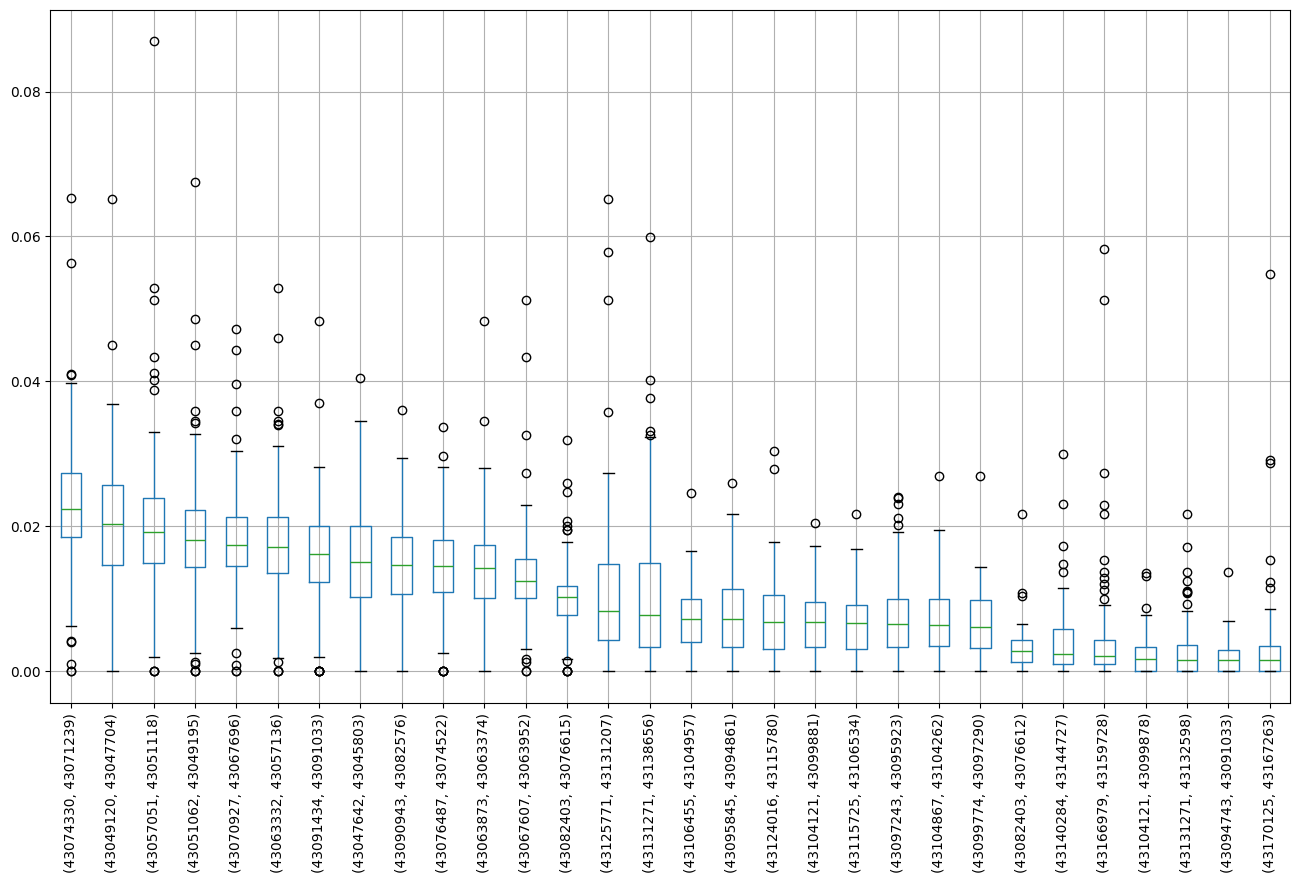

In [4]:
junctions\
    .reindex(junctions.median().sort_values(ascending=False).index, axis=1)\
    .iloc[:,:30]\
    .boxplot(figsize=(16, 9), rot=90)
plt.show()

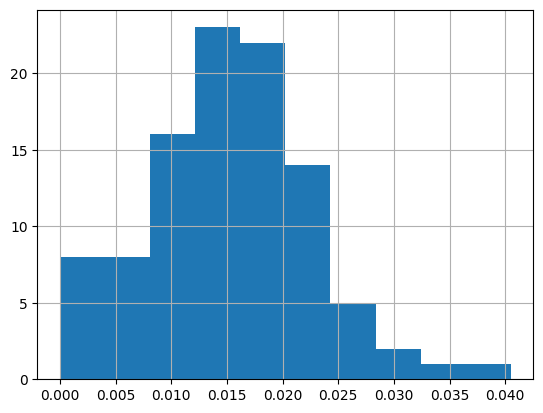

In [5]:
junctions.loc[:, junctions.columns[1]].hist()
plt.show()